## Importing Required Liabraries

In [70]:
from nltk import *
import matplotlib
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import operator
import re

## Importing book 1 and book 2


In [71]:
book1 = "The God of Mars.txt"
file = open(book1, 'rt')
T1 = file.read()

book2 = "Ted Strong's Motor Car.txt"
file2 = open(book2, 'rt')
T2 = file2.read()

In [73]:
len(T1)

471052

In [74]:
len(T2)

172830

In [78]:
# Removing acknowledgement
T1 = re.sub("The[\s\S]*CONTENTS","",T1)
# Removing the last part(Transciber's Notes)
T1 = re.sub(r"Transcriber’s[\s\S]*",r"",T1)
print(len(T1))

# Removing acknowledgement
T2 = re.sub("The[\s\S]*CONTENTS","",T2)
# Removing the last part(Transciber's Notes)
T2 = re.sub(r"Transcriber’s[\s\S]*",r"",T2)
len(T2)

470315


172830

## Removing chapter names

In [79]:
T1=re.sub("[A-Z]{2,}","",T1)
T1=re.sub("[0-9]+","",T1)
print(T1[:500])

T2=re.sub("[A-Z]{2,}","",T2)
T2=re.sub("[0-9]+","",T2)
print(T2[:500])

   

Edgar Rice Burroughs








Twelve years had passed since I had laid the body of my great-uncle,
Captain John Carter, of Virginia, away from the sight of men in that
strange mausoleum in the old cemetery at Richmond.

Often had I pondered on the odd instructions he had left me governing
the construction of his mighty tomb, and especially those parts which
directed that he be laid in an  casket and that the ponderous
mechanism which controlled the bolts of the vault's huge door be
accessibl
Ted Strong's Motor Car

,   


By  C. 
Author of the Ted Strong Stories






Ted Strong's Motor Car

 .

   !


Carl Schwartz burst into the living room of the Moon Valley Ranch house
with fire in his eye and pathos in his voice:

"As sheur as I standing here am, dot schwein I'm going to kill!"'

"I'll jest bet yer a million dollars ter a piece o' custard pie yer
don't," said Bud Morgan, rising from the lounge where he had been
resting after a strenuous day in the big pasture.

"I'll pet you,"

In [80]:
T1 = T1.lower()
T2=T2.lower()
print(len(T1))
len(T2)

468720


172346

In [81]:
sentences = sent_tokenize(T1)
print(sentences[0])

sentences2 = sent_tokenize(T2)
print(sentences2[0])

   

edgar rice burroughs








twelve years had passed since i had laid the body of my great-uncle,
captain john carter, of virginia, away from the sight of men in that
strange mausoleum in the old cemetery at richmond.
ted strong's motor car

,   


by  c. 
author of the ted strong stories






ted strong's motor car

 .


## Tokenizing T1 and T2

In [82]:
tokens = word_tokenize(T1)
print(tokens[0:10])
print(len(tokens))


tokens2 = word_tokenize(T2)
print(tokens2[0:10])
len(tokens2)

['edgar', 'rice', 'burroughs', 'twelve', 'years', 'had', 'passed', 'since', 'i', 'had']
96502
['ted', 'strong', "'s", 'motor', 'car', ',', 'by', 'c.', 'author', 'of']


39821

## Cleaning data(Remaoval of punctuation marks etc.)

In [83]:
words = [word for word in tokens if word.isalpha()]
print(words[0:100])
print(len(words))

words2 = [word for word in tokens2 if word.isalpha()]
print(words2[0:100])
len(words2)

['edgar', 'rice', 'burroughs', 'twelve', 'years', 'had', 'passed', 'since', 'i', 'had', 'laid', 'the', 'body', 'of', 'my', 'captain', 'john', 'carter', 'of', 'virginia', 'away', 'from', 'the', 'sight', 'of', 'men', 'in', 'that', 'strange', 'mausoleum', 'in', 'the', 'old', 'cemetery', 'at', 'richmond', 'often', 'had', 'i', 'pondered', 'on', 'the', 'odd', 'instructions', 'he', 'had', 'left', 'me', 'governing', 'the', 'construction', 'of', 'his', 'mighty', 'tomb', 'and', 'especially', 'those', 'parts', 'which', 'directed', 'that', 'he', 'be', 'laid', 'in', 'an', 'casket', 'and', 'that', 'the', 'ponderous', 'mechanism', 'which', 'controlled', 'the', 'bolts', 'of', 'the', 'vault', 'huge', 'door', 'be', 'accessible', 'twelve', 'years', 'had', 'passed', 'since', 'i', 'had', 'read', 'the', 'remarkable', 'manuscript', 'of', 'this', 'remarkable', 'man', 'this']
84842
['ted', 'strong', 'motor', 'car', 'by', 'author', 'of', 'the', 'ted', 'strong', 'stories', 'ted', 'strong', 'motor', 'car', 'carl'

31830

## Lemmatization of T1 and T2


In [109]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in words])
#print(lemmatized_output)
len(lemmatized_output)

441135

In [110]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
lemmatized_output2 = ' '.join([lemmatizer.lemmatize(w) for w in words2])
#print(lemmatized_output2)
len(lemmatized_output2)

157129

## Tokenizing the lemmatized  word

In [86]:
tokens = word_tokenize(lemmatized_output)
print(tokens[0:10])
print(len(tokens))


tokens2 = word_tokenize(lemmatized_output2)
print(tokens2[0:10])
len(tokens2)

['edgar', 'rice', 'burroughs', 'twelve', 'year', 'had', 'passed', 'since', 'i', 'had']
84842
['ted', 'strong', 'motor', 'car', 'by', 'author', 'of', 'the', 'ted', 'strong']


31830

In [87]:
words = [word for word in tokens if word.isalpha()]
print(words[0:100])
print(len(words))

words2 = [word for word in tokens2 if word.isalpha()]
print(words2[0:100])
len(words2)

['edgar', 'rice', 'burroughs', 'twelve', 'year', 'had', 'passed', 'since', 'i', 'had', 'laid', 'the', 'body', 'of', 'my', 'captain', 'john', 'carter', 'of', 'virginia', 'away', 'from', 'the', 'sight', 'of', 'men', 'in', 'that', 'strange', 'mausoleum', 'in', 'the', 'old', 'cemetery', 'at', 'richmond', 'often', 'had', 'i', 'pondered', 'on', 'the', 'odd', 'instruction', 'he', 'had', 'left', 'me', 'governing', 'the', 'construction', 'of', 'his', 'mighty', 'tomb', 'and', 'especially', 'those', 'part', 'which', 'directed', 'that', 'he', 'be', 'laid', 'in', 'an', 'casket', 'and', 'that', 'the', 'ponderous', 'mechanism', 'which', 'controlled', 'the', 'bolt', 'of', 'the', 'vault', 'huge', 'door', 'be', 'accessible', 'twelve', 'year', 'had', 'passed', 'since', 'i', 'had', 'read', 'the', 'remarkable', 'manuscript', 'of', 'this', 'remarkable', 'man', 'this']
84842
['ted', 'strong', 'motor', 'car', 'by', 'author', 'of', 'the', 'ted', 'strong', 'story', 'ted', 'strong', 'motor', 'car', 'carl', 'schw

31830

## Calculating Frequency distribution for T1 tokens

In [90]:
fdist = FreqDist(words)
sorted_tokens = sorted(fdist.items(),reverse=True,key=operator.itemgetter(1))
sorted_tokens[1:10]

[('of', 3344),
 ('a', 2524),
 ('and', 2345),
 ('to', 2163),
 ('i', 2084),
 ('that', 1275),
 ('in', 1204),
 ('my', 909),
 ('it', 888)]

### Plotting Graph for tokens for T1

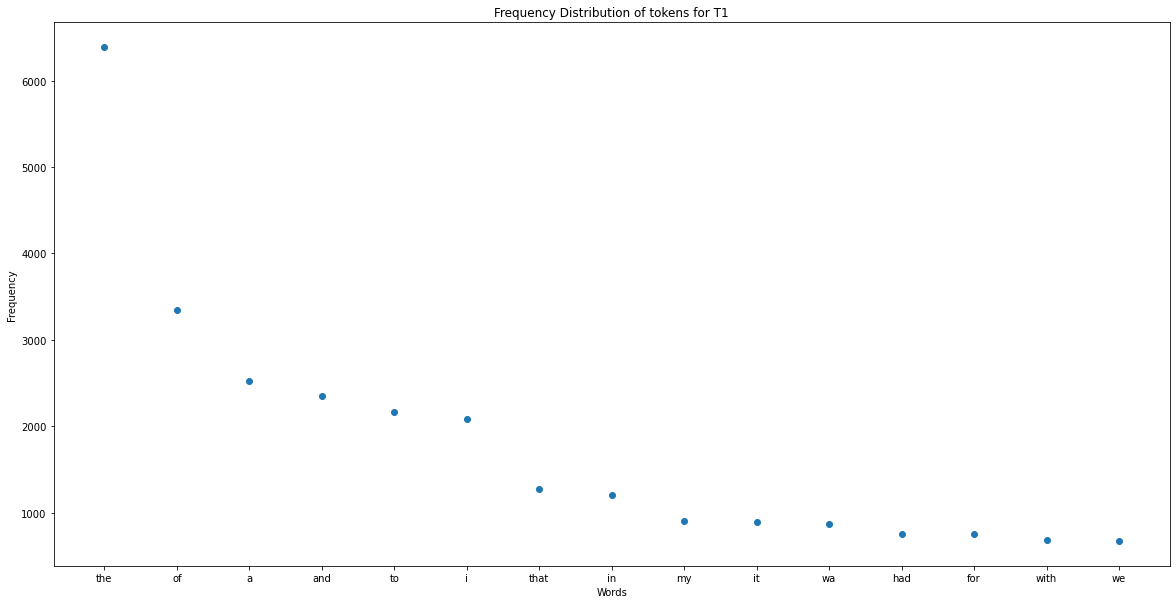

In [91]:
m=sorted_tokens[0:15]
x_axis=[]
y_axis=[]
for i in range(15):
    x_axis.append(m[i][0])
    y_axis.append(m[i][1])
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(x_axis,y_axis)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of tokens for T1")
plt.show()

## Calculating Frequency distribution for T2 tokens

In [92]:
fdist2 = FreqDist(words2)
sorted_tokens2 = sorted(fdist2.items(),reverse=True,key=operator.itemgetter(1))
sorted_tokens2[0:10]

[('the', 1911),
 ('and', 996),
 ('a', 964),
 ('to', 795),
 ('of', 661),
 ('i', 558),
 ('it', 551),
 ('he', 547),
 ('wa', 486),
 ('in', 476)]

### Plotting Graph for tokens for T2

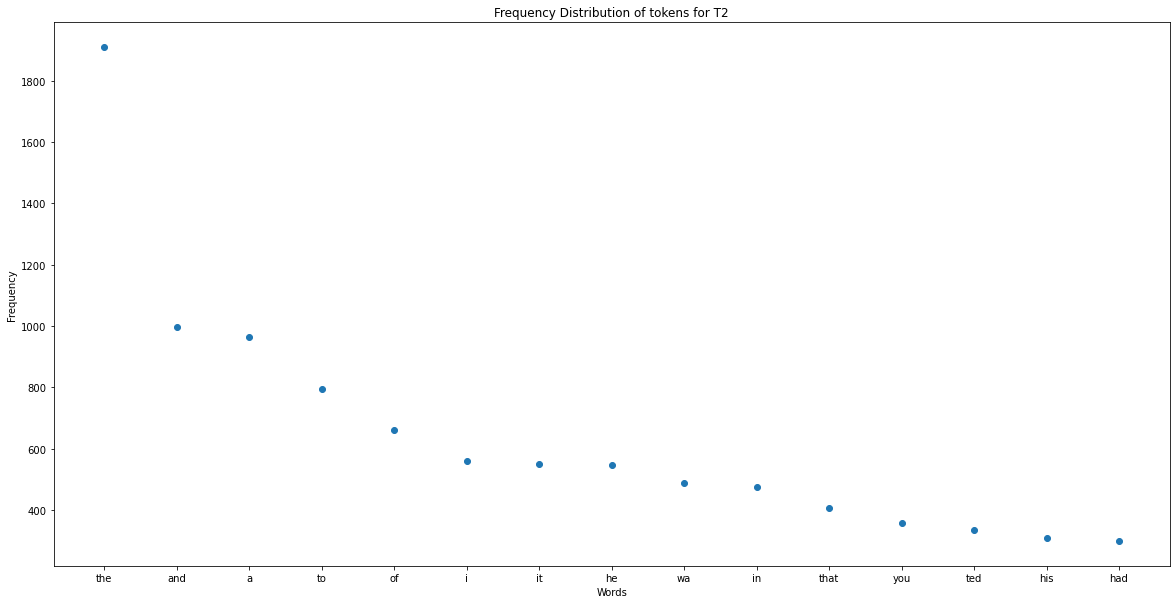

In [93]:
m=sorted_tokens2[0:15]
x_axis=[]
y_axis=[]
for i in range(15):
    x_axis.append(m[i][0])
    y_axis.append(m[i][1])
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(x_axis,y_axis)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of tokens for T2")
plt.show()

## Wordcloud of T1 with stopwords

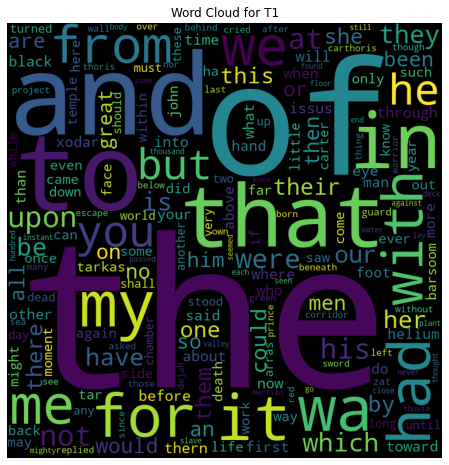

In [94]:

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height=800,
background_color='black',stopwords={},collocations=False,
min_font_size=10).generate_from_text(' '.join(words))
plt.figure(figsize=(8,8),facecolor=None,)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud for T1")
plt.show()

## Wordcloud of T2 with stopwords 

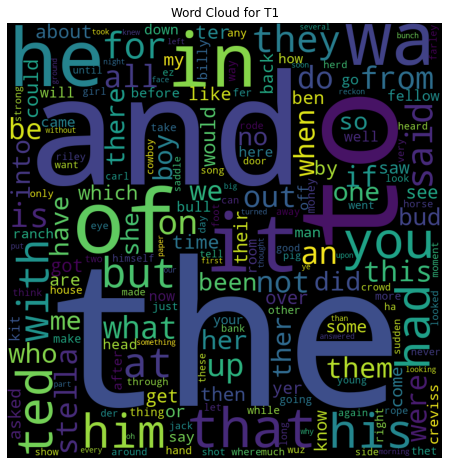

In [95]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height=800,
background_color='black',stopwords={},collocations=False,
min_font_size=10).generate_from_text(' '.join(words2))
plt.figure(figsize=(8,8),facecolor=None,)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud for T1")
plt.show()

### Loading the stopwords set

In [96]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## FIltereing out stopwords from T1

In [97]:
filtered_sentence=[]
for w1 in words: 
    if w1 not in stop_words: 
        filtered_sentence.append(w1) 

## Wordcloud of T1 after removing stopwords

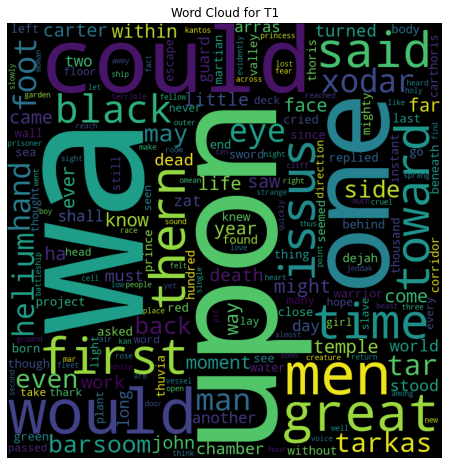

In [98]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height=800,
background_color='black',stopwords={},collocations=False,
min_font_size=10).generate_from_text(' '.join(filtered_sentence))
plt.figure(figsize=(8,8),facecolor=None,)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud for T1")
plt.show()

## FIltereing out stopwords from T2

In [99]:
filtered_sentence2=[]
for w2 in words2: 
    if w2 not in stop_words: 
        filtered_sentence2.append(w2) 

## Wordcloud of T2 after removing stopwords

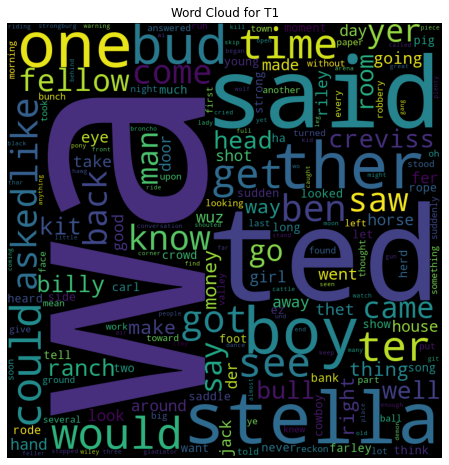

In [100]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height=800,
background_color='black',stopwords={},collocations=False,
min_font_size=10).generate_from_text(' '.join(filtered_sentence2))
plt.figure(figsize=(8,8),facecolor=None,)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud for T1")
plt.show()

## Pos Tagging for T1

In [101]:
import nltk
Tagged_T1 =nltk.pos_tag(words)
print(Tagged_T1[0:30])

[('edgar', 'NN'), ('rice', 'NN'), ('burroughs', 'NNS'), ('twelve', 'VBP'), ('year', 'NN'), ('had', 'VBD'), ('passed', 'VBN'), ('since', 'IN'), ('i', 'NN'), ('had', 'VBD'), ('laid', 'VBN'), ('the', 'DT'), ('body', 'NN'), ('of', 'IN'), ('my', 'PRP$'), ('captain', 'NN'), ('john', 'NN'), ('carter', 'NN'), ('of', 'IN'), ('virginia', 'FW'), ('away', 'RB'), ('from', 'IN'), ('the', 'DT'), ('sight', 'NN'), ('of', 'IN'), ('men', 'NNS'), ('in', 'IN'), ('that', 'DT'), ('strange', 'JJ'), ('mausoleum', 'NN')]


In [102]:
fdistw1 = nltk.FreqDist([t for (w, t) in Tagged_T1])
print("No. of tags", len(fdistw1.keys()))
fdistw1.keys()

No. of tags 33


dict_keys(['NN', 'NNS', 'VBP', 'VBD', 'VBN', 'IN', 'DT', 'PRP$', 'FW', 'RB', 'JJ', 'PRP', 'VBG', 'CC', 'WDT', 'VB', 'WP', 'MD', 'TO', 'CD', 'RBR', 'WRB', 'VBZ', 'JJR', 'NNP', 'EX', 'JJS', 'RP', 'PDT', 'RBS', 'WP$', 'UH', 'NNPS'])

## Plotting frequency distribution for POS tags for T1

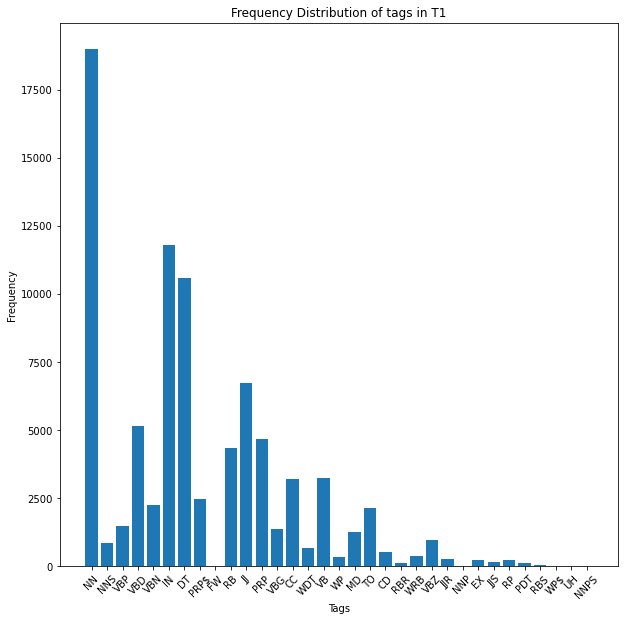

In [103]:
keys = (list(fdistw1.keys()))
# creating a list of the frequency of the various tokens
values = list(fdistw1.values())
# plotting a bar plot diagram of the frequency distribution
plt.figure(figsize=(10,10))
plt.bar(keys,values)
plt.xlabel("Tags")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.title("Frequency Distribution of tags in T1")
plt.show()

## POS Tagging for T2

In [104]:
Tagged_T2 =nltk.pos_tag(words2)
print(Tagged_T2[0:30])

[('ted', 'VBN'), ('strong', 'JJ'), ('motor', 'NN'), ('car', 'NN'), ('by', 'IN'), ('author', 'NN'), ('of', 'IN'), ('the', 'DT'), ('ted', 'VBN'), ('strong', 'JJ'), ('story', 'NN'), ('ted', 'VBN'), ('strong', 'JJ'), ('motor', 'NN'), ('car', 'NN'), ('carl', 'NN'), ('schwartz', 'NN'), ('burst', 'NN'), ('into', 'IN'), ('the', 'DT'), ('living', 'NN'), ('room', 'NN'), ('of', 'IN'), ('the', 'DT'), ('moon', 'NN'), ('valley', 'NN'), ('ranch', 'NN'), ('house', 'NN'), ('with', 'IN'), ('fire', 'NN')]


In [105]:
fdistw2 = nltk.FreqDist([t for (w, t) in Tagged_T2])
print("No. of tags", len(fdistw2.keys()))
fdistw2.keys()

No. of tags 32


dict_keys(['VBN', 'JJ', 'NN', 'IN', 'DT', 'PRP$', 'CC', 'VBG', 'RB', 'VBP', 'TO', 'VB', 'JJS', 'CD', 'VBD', 'WRB', 'PRP', 'NNS', 'RP', 'FW', 'NNP', 'VBZ', 'MD', 'WP', 'WDT', 'PDT', 'RBR', 'JJR', 'EX', 'UH', 'WP$', 'RBS'])

## Plotting frequency distribution for POS tags for T2

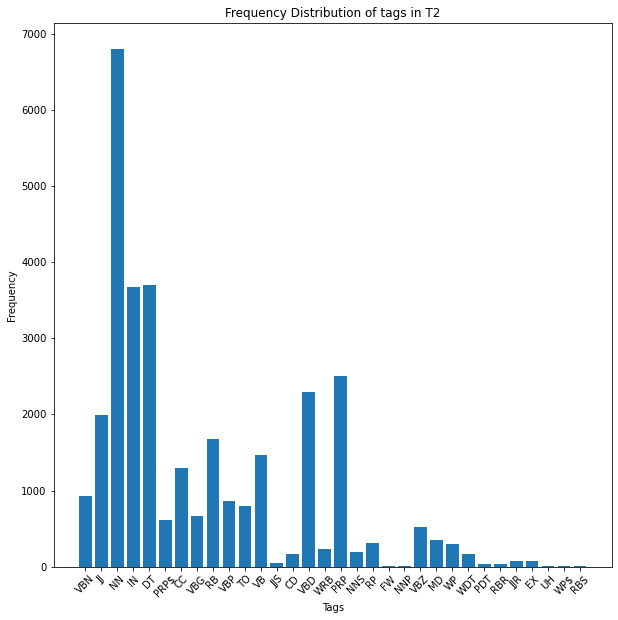

In [106]:
keys = (list(fdistw2.keys()))
# creating a list of the frequency of the various tokens
values = list(fdistw2.values())
# plotting a bar plot diagram of the frequency distribution
plt.figure(figsize=(10,10))
plt.bar(keys,values)
plt.xlabel("Tags")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.title("Frequency Distribution of tags in T2")
plt.show()

## Plotting frequency of  word length for T1

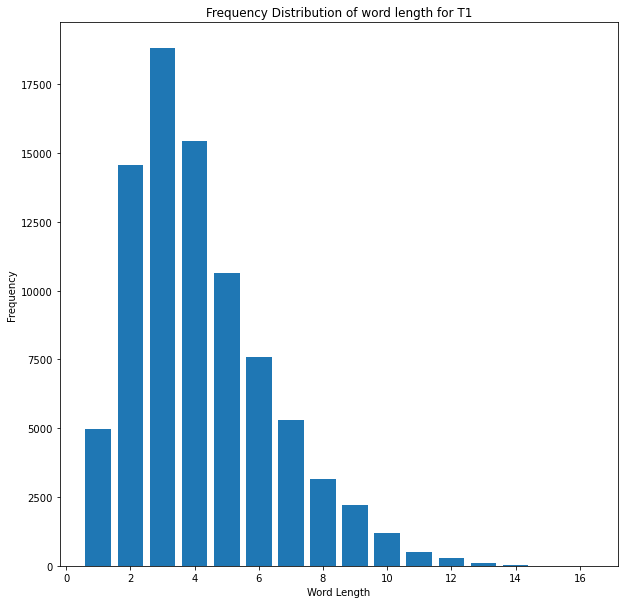

In [107]:
len_list={}
for i in range(len(words)):
    if len(words[i]) not in len_list:
        len_list[len(words[i])] = 1
    else:
        len_list[len(words[i])] += 1
keys = list(len_list.keys())
values = list(len_list.values())
plt.figure(figsize=(10,10))
plt.bar(keys,values)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of word length for T1")
plt.show()

## Plotting frequency of  word length for T2

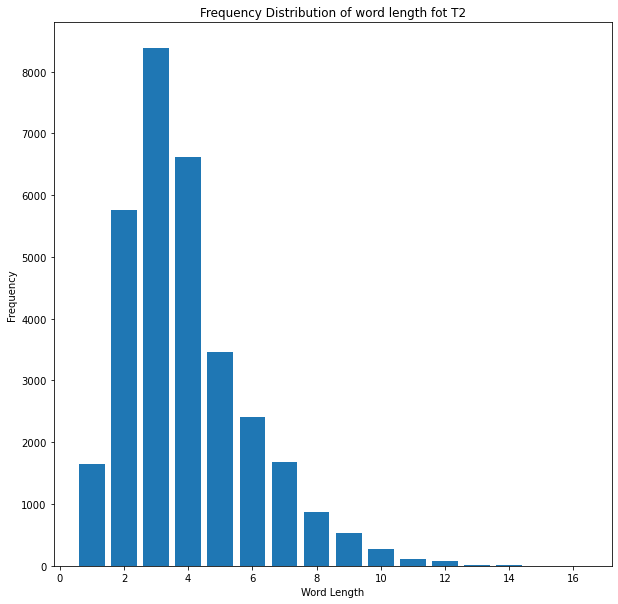

In [108]:
len_list2={}
for i in range(len(words2)):
    if len(words2[i]) not in len_list2:
        len_list2[len(words2[i])] = 1
    else:
        len_list2[len(words2[i])] += 1
keys = list(len_list2.keys())
values = list(len_list2.values())
plt.figure(figsize=(10,10))
plt.bar(keys,values)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of word length fot T2")
plt.show()